# Weight Initialization Methods
In this notebook we will explore the statistical properties of weights.

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

We will create a ```Weight_Init``` class which will return our weights initialized via different methods

In [53]:
class Weight_Init():
    def __init__(self, fan_in, fan_out):
        self.fan_in, self.fan_out = fan_in, fan_out
        
    def randn(self): 
        return torch.randn(self.fan_in, self.fan_out)
    
    def kaiming(self): 
        return torch.randn(self.fan_in, self.fan_out) * math.sqrt(2./self.fan_in)
    
    def kaiminguni(self):
        return torch.Tensor(self.fan_in, self.fan_out).uniform_(-1,1) * math.sqrt(2./self.fan_in)
    
    def pytorch(self):
        w = torch.Tensor(self.fan_in, self.fan_out)
        return nn.init.kaiming_uniform_(w, mode='fan_in')
    
    def xavier(self): 
        return torch.Tensor(self.fan_in, self.fan_out).uniform_(-1,1) * math.sqrt(6./(self.fan_in + self.fan_out))
    
    def kaiming2(self):
        return torch.randn(self.fan_in, self.fan_out) * math.sqrt(1./self.fan_in)

In [20]:
def stats(x):
    xs = x[0]
    return xs.mean(), xs.std(), sns.distplot(xs) 

In [55]:
# initializing
weights = Weight_Init(512, 512)

(tensor(-0.0653),
 tensor(1.0282),
 <matplotlib.axes._subplots.AxesSubplot at 0x1f94e213fd0>)

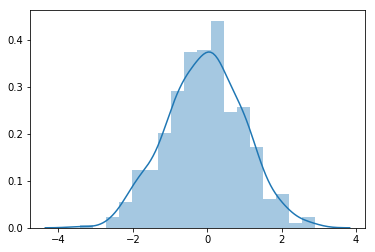

In [30]:
stats(weights.randn())

(tensor(0.0007),
 tensor(0.0637),
 <matplotlib.axes._subplots.AxesSubplot at 0x1f94c94b198>)

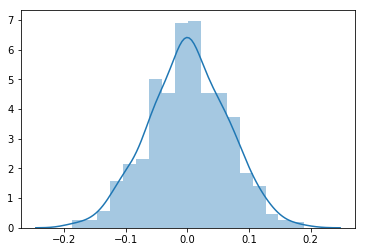

In [29]:
stats(weights.kaiming())

(tensor(0.0032),
 tensor(0.0454),
 <matplotlib.axes._subplots.AxesSubplot at 0x1f94e393a20>)

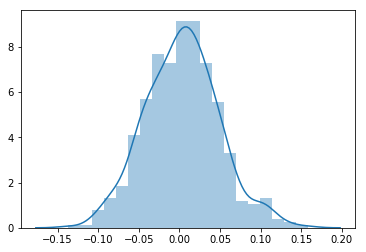

In [31]:
stats(weights.kaiming2())

(tensor(0.0028),
 tensor(0.0461),
 <matplotlib.axes._subplots.AxesSubplot at 0x1f94e3924a8>)

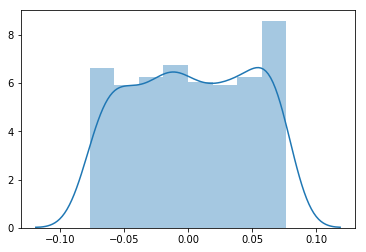

In [32]:
stats(weights.xavier())

(tensor(-0.0010),
 tensor(0.0632),
 <matplotlib.axes._subplots.AxesSubplot at 0x1f94e6642e8>)

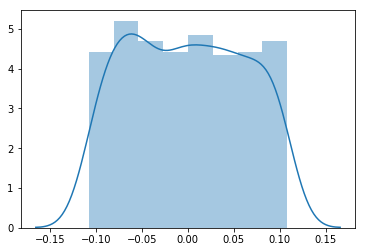

In [56]:
stats(weights.pytorch())